In [1]:
# Spark init
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# extract tar file 
!tar -xvf "/content/drive/MyDrive/data/yelp_dataset.tar" -C "/content/drive/MyDrive/data/"

Dataset_User_Agreement.pdf
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
^C


In [ ]:
# importing needed functions
from pyspark.sql.types import *
from pyspark.sql import SparkSession
import pyspark.sql.functions as func 
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
from numpy.lib.function_base import average
import matplotlib

In [ ]:
# creating spark
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
# reading dataframes
df_yelp_business = spark.read.json('/content/drive/MyDrive/data/yelp_academic_dataset_business.json')
df_yelp_review = spark.read.json('/content/drive/MyDrive/data/yelp_academic_dataset_review.json')
df_yelp_user = spark.read.json('/content/drive/MyDrive/data/yelp_academic_dataset_user.json')

In [ ]:
# displaying yelp businesses and data types
df_yelp_business.show()
df_yelp_business.printSchema()

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|                null|      0|   34.4266787|  -119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|{8:0-18:30, 0:0-0...|      1|   

In [ ]:
# displaying yelp reviews and data types
df_yelp_review.show()
df_yelp_review.printSchema()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [ ]:
# displaying yelp users and data types
df_yelp_user.show()
df_yelp_user.printSchema()

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|     name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+
|         

In [ ]:
# get data for fast food chains from yelp_businesses, but can be changed to a different category
food_criteria = ['Fast Food']
df_food_businesses = df_yelp_business[df_yelp_business.categories.contains('|'.join(food_criteria))]

# fast food restaurants with most locations and the number of reviews per restaurant
most_restaurants_count = df_food_businesses.groupBy("name").agg(func.count("name"), func.sum("review_count")).sort(desc("count(name)"))

print("Fast food restaurant dataframe")
df_food_businesses.show()
print("\n")
print("Ordered count of fast food restaurants with sum of reviews")
most_restaurants_count.show()


Fast food restaurant dataframe
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|       615 S Main St|{null, null, u'no...|CF33F8-E6oudUQ46H...|Burgers, Fast Foo...|Ashland City|{9:0-0:0, 0:0-0:0...|      1|    36.269593|    -87.058943|      Sonic Drive-In|      37015|           6|  2.0|   TN|
| 2312 Dickerson Pike|{null, null, u'no...|bBDDEgkFA1Otx9Lfe...|Ice Cream & Froze...|   Nashville|{6:0-16:0, 

In [ ]:
# can change restaurant name
restaurant_name = "McDonald's"

# average stars of all restaurants
avgStars = df_food_businesses.agg({'stars': 'avg'})

# average stars by restaurant in asc order by name
stars_by_restaurant = df_food_businesses.groupBy("name").mean("stars").sort("name")

# average star rating across all mcdonalds
stars_by_mcdonalds = stars_by_restaurant[stars_by_restaurant["name"].contains(restaurant_name)]

# average star rating by restaurant per state and count of locations per state
stars_by_restaurant_and_state = df_food_businesses.groupBy("name", "state").agg(func.avg("stars"), func.count("name")).sort("name", "state")

# average star rating by state of mcdonalds and count of locations per state
stars_by_mcdonalds_and_state = stars_by_restaurant_and_state[stars_by_restaurant_and_state["name"].contains(restaurant_name)]

print("Average star rating across all fast food restaurants")
avgStars.show()
print("\n")
print("Average star rating by restaurant")
stars_by_restaurant.show()
print("\n")
print("Average star rating by restaurant per state and count of restaurants in state")
stars_by_restaurant_and_state.show()
print("\n")
print("McDonald's average star rating across all locations")
stars_by_mcdonalds.show()
print("\n")
print("McDonald's average star rating by state and count of locations per state")
stars_by_mcdonalds_and_state.show()

Average star rating across all fast food restaurants
+------------------+
|        avg(stars)|
+------------------+
|2.6321847960444993|
+------------------+



Average star rating by restaurant
+--------------------+------------------+
|                name|        avg(stars)|
+--------------------+------------------+
|           1894 Cafe|               2.0|
|             1ST RND|               3.5|
|           3rd Coast|               4.0|
|4 Corners Bar & G...|               2.5|
|400 Degrees Hot C...|               4.0|
|       63rd St Pizza|               3.5|
|       8 Dollar Deli|               4.5|
|96th Street Steak...|               2.5|
|               A & W|               1.5|
|   A & W Restaurants|               3.0|
|                 A&W|2.8333333333333335|
|A&W All-American ...|               4.0|
|      A&W Restaurant|              2.15|
|          ABC Market|               4.0|
|         AFC chicken|               3.5|
|      Adriatic Grill|               4.0|
|Aladdi

In [ ]:
# obtaining competing fast food restaurants
competing_names =["McDonald's",'Burger King',"Wendy's", "Sonic Drive-In", "Jack in the Box", "Whataburger", "Carl's Jr", "In-N-Out Burger", "A&W Restaurant"]
competing_names_dataframe = df_food_businesses.filter(df_food_businesses.name.isin(competing_names))

print("Dataframe of competing fast food burger restaurants")
competing_names_dataframe.show()

Dataframe of competing fast food burger restaurants
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+---------------+---------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|      longitude|           name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+---------------+---------------+-----------+------------+-----+-----+
|       615 S Main St|{null, null, u'no...|CF33F8-E6oudUQ46H...|Burgers, Fast Foo...|Ashland City|{9:0-0:0, 0:0-0:0...|      1|    36.269593|     -87.058943| Sonic Drive-In|      37015|           6|  2.0|   TN|
| 2312 Dickerson Pike|{null, null, u'no...|bBDDEgkFA1Otx9Lfe...|Ice Cream & Froze...|   Nashville|{6:0-1

In [ ]:
# comparing data of competing fast food restaurants
star_average = competing_names_dataframe.agg({'stars': 'avg'})

# average stars by restaurant in asc order by name
stars_by_competitor = competing_names_dataframe.groupBy("name").agg(func.avg("stars")).sort("name")

# average stars and count of reviews by restaurant
avg_star_and_count_reviews = competing_names_dataframe.groupBy("name").agg(func.avg("stars"), func.count("review_count")).sort("name")

print("The average star rating of all competing restaurants")
star_average.show()
print("\n")
print("Averge star rating by competing restaurants")
stars_by_competitor.show()
print("\n")
print("Average star rating and count of reviews by restaurant")
avg_star_and_count_reviews.show()
print("\n")

The average star rating of all competing restaurants
+------------------+
|        avg(stars)|
+------------------+
|1.9932926829268294|
+------------------+



Averge star rating by competing restaurants
+---------------+------------------+
|           name|        avg(stars)|
+---------------+------------------+
| A&W Restaurant|              2.15|
|    Burger King|2.0346385542168677|
|      Carl's Jr| 2.212121212121212|
|In-N-Out Burger|               4.0|
|Jack in the Box|  2.00990099009901|
|     McDonald's|1.8639601139601139|
| Sonic Drive-In|2.2389380530973453|
|        Wendy's| 2.015105740181269|
|    Whataburger|            3.4375|
+---------------+------------------+



Average star rating and count of reviews by restaurant
+---------------+------------------+-------------------+
|           name|        avg(stars)|count(review_count)|
+---------------+------------------+-------------------+
| A&W Restaurant|              2.15|                 10|
|    Burger King|2.034638554

In [ ]:
# can change name, state, or city
restaurant_name = "McDonald's"
state_name = "PA"
city_name = "Philadelphia"

# creating a dataframe from mcdonalds located in the state of Pennsylvania (PA)
df_mcdonalds_data = df_food_businesses[df_food_businesses["name"].contains(restaurant_name)]
df_mcdonalds_state_data = df_mcdonalds_data[df_mcdonalds_data["state"].contains(state_name)]

# details of cities in PA 
mcdonalds_city_data_review_count = df_mcdonalds_state_data.groupBy("name", "city").agg(func.avg("stars"), func.count("name"), func.sum("review_count")).sort(desc("sum(review_count)"))

# getting ranking list of highest and lowest star rated cities 
mcdonalds_city_avg_star_rating_high = df_mcdonalds_state_data.groupBy("name", "city").agg(func.avg("stars"), func.count("name"), func.sum("review_count")).sort(desc("avg(stars)"))
mcdonalds_city_avg_star_rating_low = df_mcdonalds_state_data.groupBy("name", "city").agg(func.avg("stars"), func.count("name"), func.sum("review_count")).sort("avg(stars)")

# obtaining detailed data from city of Philadelphia
selected_city_data = df_mcdonalds_state_data[df_mcdonalds_state_data["city"].contains(city_name)]
philadelphia_data = selected_city_data.groupBy("address", "business_id","postal_code").agg(func.avg("stars"), func.sum("review_count")).sort(desc("sum(review_count)"))

# postal code data if wanted
postal_code_data = selected_city_data.groupBy("postal_code").agg(func.avg("stars"), func.sum("review_count")).sort(desc("sum(review_count)"))

print("McDonald's dataframe from the state of Pennsylvania (PA)")
df_mcdonalds_state_data.show()
print("\n")
print("McDonald's locations group by city with average star rating, count of location per city, and sum of reviews by city")
mcdonalds_city_data_review_count.show()
print("\n")
print("Cities that are ordered by highest star rating")
mcdonalds_city_avg_star_rating_high.show()
print("\n")
print("Cities that are ordered by lowest star rating")
mcdonalds_city_avg_star_rating_low.show()
print("\n")
print("Data based on the city of Philadelphia, ranked by the sum of review count")
philadelphia_data.show()
print("\n")
print("Data based on postal code ranked by sum of review count")
postal_code_data.show()

McDonald's dataframe from the state of Pennsylvania (PA)
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+----------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|     latitude|     longitude|      name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+----------+-----------+------------+-----+-----+
|       2333 Welsh Rd|{null, null, null...|aNXw3PkXVt8ANwLyC...|Restaurants, Fast...|      Lansdale|{6:0-0:0, 6:0-23:...|      1|40.2637063378|-75.3179157563|McDonald's|      19446|          17|  1.5|   PA|
|501 Franklin Mill...|{null, null, null...|kLSEk3qXY1KdtFjxH...|Restaurants, Fast...|  Philadelphia|{5:30-1:0, 5:30

In [ ]:
# joining yelp_review dataframe with mcdonalds dataframe 
print("McDonald's dataframe and Review dataframe joined")
df_reviews_and_restaurant_data = df_mcdonalds_data.join(df_yelp_review, 'business_id') \
                                                                                .select(df_mcdonalds_data['business_id'],
                                                                                df_mcdonalds_data['address'],
                                                                                df_mcdonalds_data['city'],
                                                                                df_mcdonalds_data['postal_code'],
                                                                                df_mcdonalds_data['state'],
                                                                                df_mcdonalds_data['stars'].alias('location_avg_star_rating'),
                                                                                df_yelp_review['review_id'],
                                                                                df_yelp_review['text'],
                                                                                df_yelp_review['user_id'],
                                                                                df_yelp_review['stars'].alias('user_star_rating'))

df_reviews_and_restaurant_data.show()
print("\n")
print("Number of rows in dataframe")
df_reviews_and_restaurant_data.count()

McDonald's dataframe and Review dataframe joined
+--------------------+-------------------+------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|         business_id|            address|        city|postal_code|state|location_avg_star_rating|           review_id|                text|             user_id|user_star_rating|
+--------------------+-------------------+------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|EEOgBTYNuaAHDSOBX...|7190 Pendleton Pike|Indianapolis|      46226|   IN|                     3.0|gTv1CwizT4nt_NWkr...|I really wanted t...|-6it8Ywn7yYiAofCd...|             5.0|
|EEOgBTYNuaAHDSOBX...|7190 Pendleton Pike|Indianapolis|      46226|   IN|                     3.0|P-FAFSQnZ9JTCYog1...|Horrible just hor...|Hex9jpIVJKozkFeD5...|             1.0|
|EEOgBTYNuaAHDSOBX...|7190 Pendleton Pike|Indianapolis| 

18196

In [ ]:
# removing duplicate text reviews
print("Removed Text duplicates dataframe")
df_removed_text_duplicates = df_reviews_and_restaurant_data.dropDuplicates(['text'])
df_removed_text_duplicates.show()
print("\n")
print("Number of rows in dataframe")
df_removed_text_duplicates.count()

Removed Text duplicates dataframe
+--------------------+--------------------+------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|         business_id|             address|        city|postal_code|state|location_avg_star_rating|           review_id|                text|             user_id|user_star_rating|
+--------------------+--------------------+------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|W0JwMDaPz4KxJPqiU...|  1257 Lancaster Ave|   Bryn Mawr|      19010|   PA|                     1.5|7Ue9a_4P7j5yAnLYq...|24 hours is wrong...|z0IoM2Y7OHYtiz5jC...|             1.0|
|SuzwgDT71HxOccHXs...|  2005 Richardson Rd|      Arnold|      63010|   MO|                     1.5|S3tztkq27KIunwIsp...|Absolute garbage ...|eCFyFv6Jwn1kL9uy6...|             2.0|
|dGlMJzK84qUU8zwdb...|      5416 S East St|Indianapolis|      4622

18161

In [ ]:
# checking overall star rating of mcdonalds after duplicates deleted
print("Average star rating of all McDonald's after deleting duplicates")
df_removed_text_duplicates.agg({'location_avg_star_rating': 'avg'}).show()
print("\n")
print("Average star rating with duplicates")
stars_by_mcdonalds.show()


Average star rating of all McDonald's after deleting duplicates
+-----------------------------+
|avg(location_avg_star_rating)|
+-----------------------------+
|           1.7760310555586145|
+-----------------------------+



Average star rating with duplicates
+----------+------------------+
|      name|        avg(stars)|
+----------+------------------+
|McDonald's|1.8639601139601139|
+----------+------------------+



In [ ]:
# wasnt sure if these dataframes could be used somehow
# creating dataframes of locations that average star rating both below and above 3.5 stars
df_restauran_data_equal_above_3_half_stars = df_removed_text_duplicates[(df_removed_text_duplicates['location_avg_star_rating'] >= 3.5)]

df_restaurant_data_below_3_half_stars = df_removed_text_duplicates[(df_removed_text_duplicates['location_avg_star_rating'] < 3.5)]
print("\n")

# creating dataframes of users who rated below and above 3 stars
df_users_votes_equal_3_stars = df_removed_text_duplicates[(df_removed_text_duplicates['user_star_rating'] >= 3)]
df_users_votes_below_3_stars = df_removed_text_duplicates[(df_removed_text_duplicates['user_star_rating'] < 3)]

print("McDonald's locations that average 3.5 stars or more")
df_restauran_data_equal_above_3_half_stars.show()
print("\n")
print("McDonald's locations that average 3 stars or less")
df_restaurant_data_below_3_half_stars.show()
print("\n")
print("User reviews who voted McDonald's 3 stars or more")
df_users_votes_equal_3_stars.show()
print("\n")
print("User reviews who voted McDonald's less than 3 stars")
df_users_votes_below_3_stars.show()



McDonald's locations that average 3.5 stars or more
+--------------------+--------------------+---------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|         business_id|             address|           city|postal_code|state|location_avg_star_rating|           review_id|                text|             user_id|user_star_rating|
+--------------------+--------------------+---------------+-----------+-----+------------------------+--------------------+--------------------+--------------------+----------------+
|k41dv3Pjnx0fHgkoy...|      760 W Route 70|        Marlton|      08053|   NJ|                     3.5|aqLVWvzFi4vxJfk_j...|In general I don'...|zUk_Ww2q1At1QSyRb...|             3.0|
|PN63nkTW7UBPeVTMZ...|       403 Delsea Dr|         Malaga|      08328|   NJ|                     3.5|UZ6ZNUfVVTM3Wf75O...|McDonald's is way...|BnVpjjj_3HmPnvmnV...|             5.0|
|wJ3zqDpuxUKFtUWIV...|11909 Fis

<BarContainer object of 14 artists>

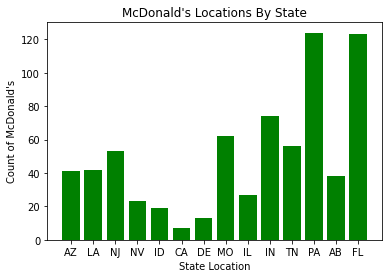

In [ ]:
df_state = df_mcdonalds_data.groupby('state').count()  
dict = df_state.rdd.collectAsMap() 
plt.bar(list(dict.keys()), dict.values(), color='g')
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

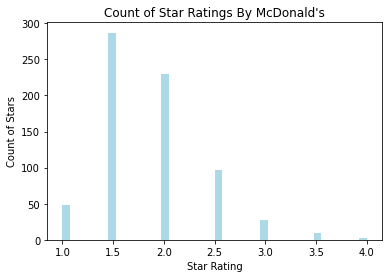

In [ ]:
stardf = df_mcdonalds_data.select('stars').collect()
star_list=[]
star_len=len(stardf)
for i in range(0, star_len):
  star_list.append(stardf[i].stars)
plt.hist(star_list, bins=40, color='lightblue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 4)


plt.title("Count of Star Ratings By McDonald's")
plt.xlabel('Star Rating')
plt.ylabel('Count of Stars')
plt.show()